# **TUGAS AKHIR EDA**

Kelompok Mean

Anggota :

1. Felicia (2006463976)

2. Joan Bidadari Annandale (2006571085)

3. Muhammad Jauhar Hakim (2006463982)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
Asean=['Indonesia','Malaysia','Philippines','Thailand','Singapore','Brunei','Vietnam','Laos','Cambodia','Burma']
Asean1=['Indonesia','Malaysia','Philippines','Thailand','Brunei','Vietnam','Laos','Cambodia','Myanmar']
Asean2=['Indonesia','Malaysia','Philippines','Thailand','Singapore','Vietnam']
Asean3=['Indonesia','Malaysia','Philippines','Thailand','Singapore','Brunei','Vietnam','Laos','Cambodia','Myanmar']

In [ ]:
def tabelbaru(tabelgroupby,Asean):
    
    copytabel = tabelgroupby.copy()
    copytabel.reset_index(inplace=True)
    year = copytabel['Year'].unique()

    tabelbb = pd.DataFrame([],columns = Asean)
    tabelbb = tabelbb.append(year.tolist(), ignore_index=False)
    tabelbb = tabelbb.rename(columns={0:'Year'})
    tabelbb['Year'] = tabelbb['Year'].astype('int64')
    tabelbb.set_index(['Year'],inplace=True)

    for i in Asean:
        for j in range(0,(year.tolist()[-1]-year.tolist()[0]+1),(year.tolist()[1]-year.tolist()[0])):
            try:
                tabelbb[i][(year.tolist()[0])+j]=(tabelgroupby.loc[year.tolist()[0]+j].loc[i]).iloc[0]
            except:
                continue
    
    return tabelbb

## 1. Data About Global Rank Climate Risk Index 1999-2018

Source :
*   https://www.germanwatch.org/en/17307
*   https://www.germanwatch.org/sites/default/files/20-2-01e%20Global%20Climate%20Risk%20Index%202020_14.pdf

Keterangan :

A low climate risk index (CRI) indicates that particular country is at risk of either frequent or rare-but-extraordinary catastrophe

CRI = Climate Risk Index; GDP = gross domestic product; PPP = purchasing power parity

In [ ]:
cri=pd.read_csv('https://raw.githubusercontent.com/Jauhar-Hakim571/Tugas-Akhir-EDA/main/Global%20Rank%20Climate%20Risk%20Index%20for%201999%E2%80%932018.csv')
cri.set_index('Country',inplace=True)
cri

,CRI Rank 1999-2018,CRI Score,Death Toll,Deaths per 100000 Inhabitants,Total Losses in Million US$ PPP,Losses per Unit GDP in %,Number of Events (Total 1999–2018)
Country,,,,,,,
Puerto Rico,1,6.67,149.90,4.09,4567.06,3.76,25
Myanmar,2,10.33,7052.40,14.29,1630.06,0.83,55
Haiti,3,13.83,274.15,2.81,388.93,2.38,78
Philippines,4,17.67,869.80,0.96,3118.68,0.57,317
Pakistan,5,28.83,499.45,0.30,3792.52,0.53,152
Vietnam,6,29.83,285.80,0.33,2018.77,0.47,226
Bangladesh,7,30.00,577.45,0.39,1686.33,0.41,191
Thailand,8,31.00,140.00,0.21,7764.06,0.87,147
Nepal,9,31.50,228.00,0.87,225.86,0.40,180


In [ ]:
cri_asean = cri.loc[['Myanmar','Philippines','Vietnam','Thailand']]
cri_asean

,CRI Rank 1999-2018,CRI Score,Death Toll,Deaths per 100000 Inhabitants,Total Losses in Million US$ PPP,Losses per Unit GDP in %,Number of Events (Total 1999–2018)
Country,,,,,,,
Myanmar,2,10.33,7052.4,14.29,1630.06,0.83,55
Philippines,4,17.67,869.8,0.96,3118.68,0.57,317
Vietnam,6,29.83,285.8,0.33,2018.77,0.47,226
Thailand,8,31.00,140.0,0.21,7764.06,0.87,147


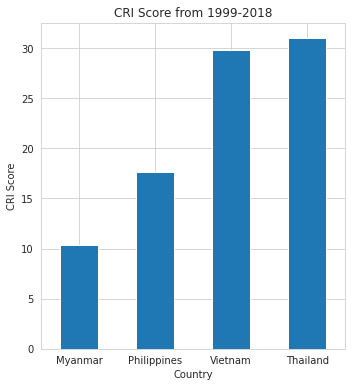

In [ ]:
fig=plt.figure(figsize=(12,6))
ax0=fig.add_subplot(1,2,1)

#Bar Cri Score
cri_asean['CRI Score'].plot(kind='bar',ax=ax0)
ax0.set_xlabel('Country')
ax0.set_ylabel('CRI Score')
ax0.set_title('CRI Score from 1999-2018')
ax0.tick_params(labelrotation=0)

plt.show()

In [ ]:
cri_asean.drop('CRI Rank 1999-2018', axis=1, inplace=True)
cri_asean.drop('CRI Score', axis=1, inplace=True)
cri_asean.drop('Deaths per 100000 Inhabitants', axis=1, inplace=True)
cri_asean.drop('Losses per Unit GDP in %', axis=1, inplace=True)
cri_asean.sum()

Death Toll                             8348.00
Total Losses in Million US$ PPP       14531.57
Number of Events (Total 1999–2018)      745.00
dtype: float64

## 2. Data About Above-Ground Biomass In Forest Per Hectare (Excluding Singapore)

Source :
*   https://ourworldindata.org/grapher/above-ground-biomass-in-forest-per-hectare
*   https://unstats.un.org/sdgs/indicators/database/


Keterangan :

Above ground biomass density, measured in tonnes of forest biomass per hectare. 

Kepadatan biomassa di atas tanah, diukur dalam ton biomassa hutan per hektar.

In [ ]:
forest = pd.read_csv('https://raw.githubusercontent.com/Jauhar-Hakim571/Tugas-Akhir-EDA/main/above-ground-biomass-in-forest-per-hectare.csv')
forest.head()

,Entity,Code,Year,15.2.1 - Above-ground biomass in forest per hectare (tonnes per hectare) - AG_LND_FRSTBIOPHA
0,Afghanistan,AFG,2000,46.960
1,Afghanistan,AFG,2005,46.960
2,Afghanistan,AFG,2010,46.960
3,Afghanistan,AFG,2015,46.960
4,Africa,NaN,2000,161.604


In [ ]:
forest.set_index(['Entity'],inplace = True)
forest.head()

,Code,Year,15.2.1 - Above-ground biomass in forest per hectare (tonnes per hectare) - AG_LND_FRSTBIOPHA
Entity,,,
Afghanistan,AFG,2000,46.960
Afghanistan,AFG,2005,46.960
Afghanistan,AFG,2010,46.960
Afghanistan,AFG,2015,46.960
Africa,NaN,2000,161.604


In [ ]:
forest_asean = forest.loc[Asean1]

forest_asean.reset_index(inplace=True)
forest_asean.set_index(['Year'],inplace=True)
forest_asean.drop('Code', axis=1, inplace=True)
forest_asean.head()

,Entity,15.2.1 - Above-ground biomass in forest per hectare (tonnes per hectare) - AG_LND_FRSTBIOPHA
Year,,
2000,Indonesia,244.31
2005,Indonesia,233.76
2010,Indonesia,220.54
2015,Indonesia,206.32
2000,Malaysia,206.61


In [ ]:
forest_asean2 = forest.loc[Asean1].groupby(['Year','Entity']).sum()
forest_asean2.head()

15.2.1 - Above-ground biomass in forest per hectare (tonnes per hectare) - AG_LND_FRSTBIOPHA
Year Entity                                                                                                 
2000 Brunei                                                329.37                                           
     Cambodia                                               63.40                                           
     Indonesia                                             244.31                                           
     Laos                                                  121.20                                           
     Malaysia                                              206.61

In [ ]:
forest_asean3 = tabelbaru(forest_asean2,Asean1)
forest_asean3.head()

,Brunei,Cambodia,Indonesia,Laos,Malaysia,Myanmar,Philippines,Thailand,Vietnam
Year,,,,,,,,,
2000,329.37,63.4,244.31,121.2,206.61,92.26,158.53,86.83,131.83
2005,325.96,63,233.76,116.42,201.72,92.25,153.76,91.3,122.96
2010,323.26,62.71,220.54,108.05,196.85,92.25,148.95,90.77,116.44
2015,323.68,62.39,206.32,100.53,215.45,94.72,144.28,88.24,115.75


In [ ]:
forest_asean3.dtypes

Brunei         object
Cambodia       object
Indonesia      object
Laos           object
Malaysia       object
Myanmar        object
Philippines    object
Thailand       object
Vietnam        object
dtype: object

In [ ]:
for i in Asean1:
    forest_asean3[i] = pd.to_numeric(forest_asean3[i])

forest_asean3.dtypes

Brunei         float64
Cambodia       float64
Indonesia      float64
Laos           float64
Malaysia       float64
Myanmar        float64
Philippines    float64
Thailand       float64
Vietnam        float64
dtype: object

In [ ]:
print(forest_asean3.isnull().sum())

Brunei         0
Cambodia       0
Indonesia      0
Laos           0
Malaysia       0
Myanmar        0
Philippines    0
Thailand       0
Vietnam        0
dtype: int64


In [ ]:
forest_asean3['Rata-Rata']=forest_asean3.mean(axis=1)
forest_asean3

,Brunei,Cambodia,Indonesia,Laos,Malaysia,Myanmar,Philippines,Thailand,Vietnam,Rata-Rata
Year,,,,,,,,,,
2000,329.37,63.40,244.31,121.20,206.61,92.26,158.53,86.83,131.83,159.371111
2005,325.96,63.00,233.76,116.42,201.72,92.25,153.76,91.30,122.96,155.681111
2010,323.26,62.71,220.54,108.05,196.85,92.25,148.95,90.77,116.44,151.091111
2015,323.68,62.39,206.32,100.53,215.45,94.72,144.28,88.24,115.75,150.151111


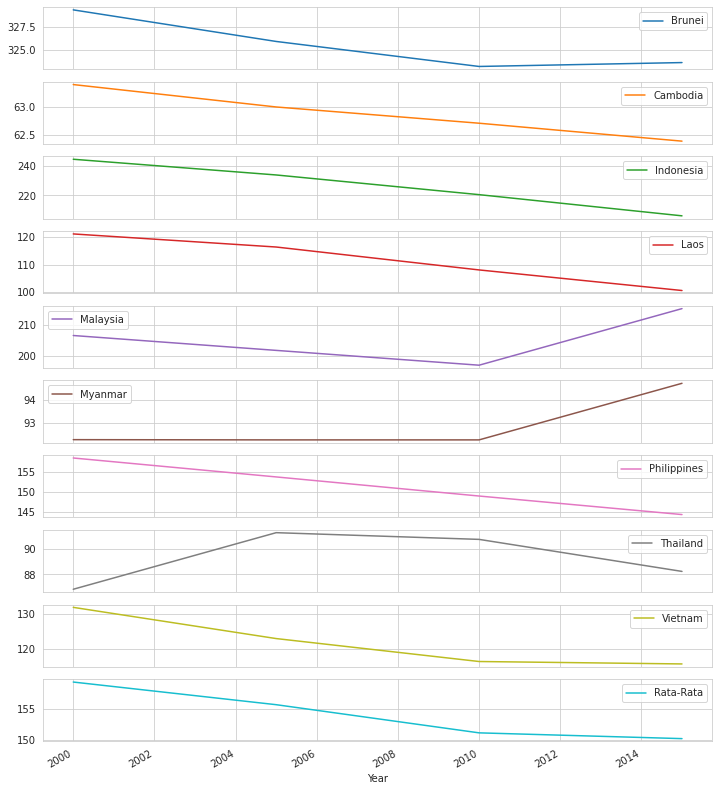

In [ ]:
for_p = forest_asean3.plot(subplots=True, figsize=(12,15))

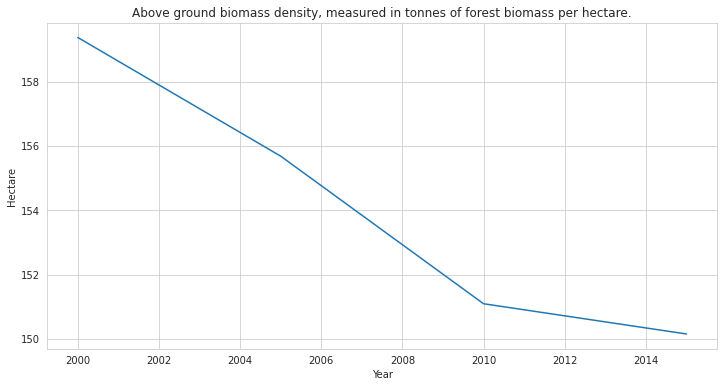

In [ ]:
plt.figure(figsize=(12,6))
for_q=sns.lineplot(x='Year', y='Rata-Rata', data=forest_asean3,palette='Set1')

for_q.set(xlabel ="Year",ylabel='Hectare',title ='Above ground biomass density, measured in tonnes of forest biomass per hectare.')

for_q.figure.savefig('lineforest.png')

plt.show()

## 3. Data About Total Greenhouse Gas Emissions, Including Land Use and Forestry

Source : 
*   https://ourworldindata.org/grapher/total-ghg-emissions?tab=chart
*   https://www.climatewatchdata.org/data-explorer/historical-emissions

Keterangan :

Greenhouse gas emissions are measured in Metric tons of carbon dioxide-equivalents (MtCO₂e), including emissions from land-use change and forestry.

Emisi gas rumah kaca diukur dalam metrik ton setara karbon dioksida (MtCO₂e), 
termasuk emisi dari perubahan penggunaan lahan dan kehutanan.

In [ ]:
emisi = pd.read_csv('https://raw.githubusercontent.com/Jauhar-Hakim571/Tugas-Akhir-EDA/main/historical_emissions%20include%20luhf.csv')
emisi.head()

,Country,Data source,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Total including LUCF,All GHG,MtCO₂e,48939.71,47990.47,47413.95,46760.47,46647.29,46047.13,45427.61,44891.40,44758.58,43029.01,43003.97,42644.63,41831.65,40300.03,39437.14,37618.01,36727.84,35701.77,35607.73,34948.94,34929.19,35387.89,34068.91,33703.46,32977.47,32766.49,32670.32,32813.46,32645.91
1,World,CAIT,Total including LUCF,CO2,MtCO₂e,36441.55,35588.70,35160.60,34521.91,34558.59,34217.18,33620.34,33226.01,33328.38,31769.89,31856.76,31608.28,30905.93,29663.75,28826.48,27308.37,26486.63,25726.42,25637.87,24957.30,24895.32,25292.92,24214.92,23890.22,23260.29,23124.00,22988.29,23056.40,22849.92
2,China,CAIT,Total including LUCF,All GHG,MtCO₂e,11705.81,11408.26,11207.66,11149.68,11155.76,11144.76,10690.04,10364.83,9872.37,9046.19,8455.65,8165.43,7547.54,6862.81,6135.95,5386.89,4769.03,4459.91,4249.70,4053.37,4103.23,3963.61,3954.75,3918.30,3528.81,3377.79,3154.54,3023.38,2873.71
3,China,CAIT,Total including LUCF,CO2,MtCO₂e,9663.36,9367.67,9164.21,9120.27,9184.77,9226.51,8823.05,8568.09,8138.34,7382.89,6862.78,6655.98,6099.67,5486.88,4789.59,4081.05,3476.08,3194.50,2994.73,2799.84,2882.75,2779.27,2715.50,2735.48,2414.50,2294.12,2068.77,1952.78,1823.96
4,World,CAIT,Total including LUCF,CH4,MtCO₂e,8298.27,8228.64,8172.01,8240.68,8161.13,8001.46,8006.94,7934.65,7816.38,7772.89,7677.21,7582.12,7590.39,7373.14,7384.47,7192.59,7164.50,6978.29,6990.50,7016.09,7043.09,7166.15,6944.08,6946.31,6936.72,6962.51,6983.94,7048.78,7072.53


In [ ]:
emisi.set_index('Country',inplace=True)
emisi_asean=emisi.loc[Asean3]
emisi_asean.reset_index(inplace=True)
emisi_asean.set_index('Gas',inplace=True)
emisi_asean2=emisi_asean.loc['All GHG']
emisi_asean2.reset_index(inplace=True)
emisi_asean2=emisi_asean2.drop(['Gas', 'Data source','Sector','Unit'], axis=1)
emisi_asean2.set_index('Country',inplace=True)
emisi_asean3=emisi_asean2.transpose()
emisi_asean3.reset_index(inplace=True)
emisi_asean3.rename(columns={"index": "Year"},inplace=True)
emisi_asean3.sort_values(by='Year',ascending=True,inplace=True)
emisi_asean3.set_index('Year',inplace=True)

In [ ]:
emisi_asean3.head()

Country,Indonesia,Malaysia,Philippines,Thailand,Singapore,Brunei,Vietnam,Laos,Cambodia,Myanmar
Year,,,,,,,,,,
1990,1257.10,207.11,98.21,174.02,31.56,15.51,1.17,20.45,25.99,207.89
1991,1274.43,214.67,98.27,186.02,34.74,15.11,4.03,20.31,25.80,207.34
1992,1295.01,221.40,100.41,197.92,37.34,15.45,6.54,20.56,26.45,209.89
1993,1311.27,224.79,105.92,214.03,44.23,15.86,13.23,20.52,27.38,212.57
1994,1327.87,231.70,113.69,228.84,47.80,16.28,18.85,20.83,26.30,215.09


In [ ]:
emisi_asean3.dtypes

Country
Indonesia      float64
Malaysia       float64
Philippines    float64
Thailand       float64
Singapore      float64
Brunei         float64
Vietnam        float64
Laos           float64
Cambodia       float64
Myanmar        float64
dtype: object

In [ ]:
emisi_asean3['Rata-Rata']=emisi_asean3.mean(axis=1)
emisi_asean3.head()

Country,Indonesia,Malaysia,Philippines,Thailand,Singapore,Brunei,Vietnam,Laos,Cambodia,Myanmar,Rata-Rata
Year,,,,,,,,,,,
1990,1257.10,207.11,98.21,174.02,31.56,15.51,1.17,20.45,25.99,207.89,203.901
1991,1274.43,214.67,98.27,186.02,34.74,15.11,4.03,20.31,25.80,207.34,208.072
1992,1295.01,221.40,100.41,197.92,37.34,15.45,6.54,20.56,26.45,209.89,213.097
1993,1311.27,224.79,105.92,214.03,44.23,15.86,13.23,20.52,27.38,212.57,218.980
1994,1327.87,231.70,113.69,228.84,47.80,16.28,18.85,20.83,26.30,215.09,224.725


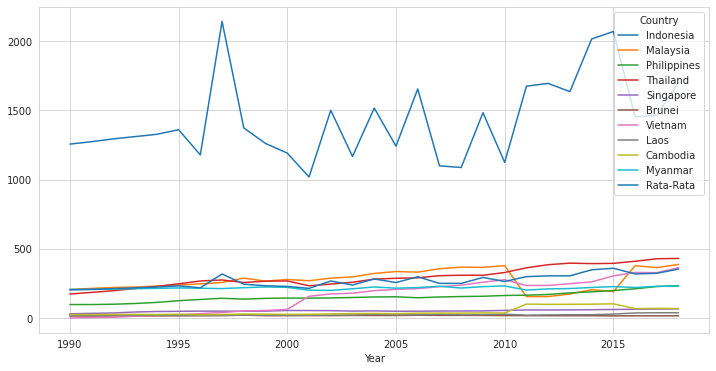

In [ ]:
emi_p = emisi_asean3.plot(subplots=False, figsize=(12,6))

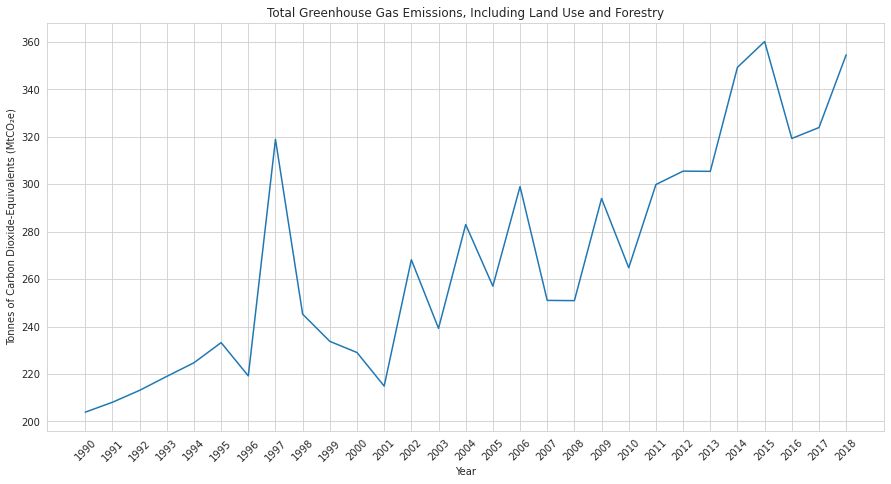

In [ ]:
plt.figure(figsize=(15,7.5))
emi_q=sns.lineplot(x='Year', y='Rata-Rata', data=emisi_asean3,palette='Set1')

emi_q.set(xlabel ="Year",ylabel='Tonnes of Carbon Dioxide-Equivalents (MtCO₂e)',title ='Total Greenhouse Gas Emissions, Including Land Use and Forestry')
plt.xticks(rotation=45)
emi_q.figure.savefig('lineemisi.png')
plt.show()

## 4. Data About Greenhouse Gas Emissions By Sector

Source:
*   https://ourworldindata.org/grapher/ghg-emissions-by-sector
*   https://www.climatewatchdata.org/data-explorer/historical-emissions

Keterangan :

Greenhouse gas emissions are measured in tonnes of carbon dioxide-equivalents (CO₂e).

Emisi gas rumah kaca diukur dalam ton setara karbon dioksida (CO₂e).

In [ ]:
ghgemisi=pd.read_csv('https://raw.githubusercontent.com/Jauhar-Hakim571/Tugas-Akhir-EDA/main/ghg-emissions-by-sector.csv')
ghgemisi.set_index('Year',inplace=True)
ghgemisi.head()

,Entity,Code,"Agriculture (GHG Emissions, CAIT)","Land-Use Change and Forestry (GHG Emissions, CAIT)","Waste (GHG Emissions, CAIT)","Industry (GHG Emissions, CAIT)","Manufacturing/Construction energy (GHG Emissions, CAIT)","Transport (GHG Emissions, CAIT)","Electricity & Heat (GHG Emissions, CAIT)","Buildings (GHG Emissions, CAIT)","Fugitive from energy production (GHG Emissions, CAIT)","Other Fuel Combustion (GHG Emissions, CAIT)","Bunker Fuels (GHG Emissions, CAIT)"
Year,,,,,,,,,,,,,
1990,Afghanistan,AFG,8090000.0,0.0,1230000.0,50000.0,NaN,NaN,NaN,NaN,610000.0,2630000.0,NaN
1991,Afghanistan,AFG,8410000.0,0.0,1320000.0,50000.0,NaN,NaN,NaN,NaN,520000.0,2400000.0,NaN
1992,Afghanistan,AFG,8420000.0,0.0,1400000.0,60000.0,NaN,NaN,NaN,NaN,220000.0,2180000.0,NaN
1993,Afghanistan,AFG,8500000.0,0.0,1490000.0,60000.0,NaN,NaN,NaN,NaN,160000.0,1950000.0,NaN
1994,Afghanistan,AFG,8540000.0,0.0,1580000.0,70000.0,NaN,NaN,NaN,NaN,120000.0,1720000.0,NaN


In [ ]:
ghgemisi_2016 = ghgemisi.loc[2016]
ghgemisi_2016.head()

,Entity,Code,"Agriculture (GHG Emissions, CAIT)","Land-Use Change and Forestry (GHG Emissions, CAIT)","Waste (GHG Emissions, CAIT)","Industry (GHG Emissions, CAIT)","Manufacturing/Construction energy (GHG Emissions, CAIT)","Transport (GHG Emissions, CAIT)","Electricity & Heat (GHG Emissions, CAIT)","Buildings (GHG Emissions, CAIT)","Fugitive from energy production (GHG Emissions, CAIT)","Other Fuel Combustion (GHG Emissions, CAIT)","Bunker Fuels (GHG Emissions, CAIT)"
Year,,,,,,,,,,,,,
2016,Afghanistan,AFG,15350000.0,0.0,3370000.0,740000.0,NaN,NaN,NaN,NaN,2190000.0,66390000.0,NaN
2016,Albania,ALB,3210000.0,-390000.0,980000.0,1390000.0,600000.0,2300000.0,100000.0,300000.0,0.0,610000.0,100000.0
2016,Algeria,DZA,12420000.0,-380000.0,13940000.0,16810000.0,10900000.0,45100000.0,47800000.0,20700000.0,38200000.0,4800000.0,2200000.0
2016,Andorra,AND,0.0,-20000.0,50000.0,60000.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2016,Angola,AGO,37390000.0,89250000.0,1640000.0,1350000.0,2500000.0,8400000.0,4300000.0,4300000.0,30110000.0,790000.0,1600000.0


In [ ]:
ghgemisi_2016.set_index('Entity',inplace=True)
ghgemisi_asean = ghgemisi_2016.loc[Asean3]
ghgemisi_asean.drop("Code", axis=1, inplace=True)
ghgemisi_asean.head()

,"Agriculture (GHG Emissions, CAIT)","Land-Use Change and Forestry (GHG Emissions, CAIT)","Waste (GHG Emissions, CAIT)","Industry (GHG Emissions, CAIT)","Manufacturing/Construction energy (GHG Emissions, CAIT)","Transport (GHG Emissions, CAIT)","Electricity & Heat (GHG Emissions, CAIT)","Buildings (GHG Emissions, CAIT)","Fugitive from energy production (GHG Emissions, CAIT)","Other Fuel Combustion (GHG Emissions, CAIT)","Bunker Fuels (GHG Emissions, CAIT)"
Entity,,,,,,,,,,,
Indonesia,190220000.0,1.363070e+09,129470000.0,33750000.0,84200000.0,134500000.0,206600000.0,23100000.0,33250000.0,30950000.0,3600000.0
Malaysia,13250000.0,-1.302400e+08,19940000.0,17600000.0,29600000.0,62800000.0,118500000.0,4100000.0,21180000.0,4210000.0,8200000.0
Philippines,59000000.0,-5.969000e+07,13310000.0,15780000.0,16800000.0,33300000.0,56100000.0,7900000.0,620000.0,6300000.0,4100000.0
Thailand,63930000.0,1.996000e+07,12580000.0,53880000.0,49500000.0,69200000.0,110100000.0,6500000.0,13000000.0,18580000.0,16600000.0
Singapore,120000.0,4.000000e+04,3060000.0,13360000.0,12400000.0,6500000.0,25700000.0,600000.0,960000.0,400000.0,174900000.0


In [ ]:
ghgemisi_asean.sum()

Agriculture (GHG Emissions, CAIT)                          5.075100e+08
Land-Use Change and Forestry (GHG Emissions, CAIT)         1.339480e+09
Waste (GHG Emissions, CAIT)                                2.042500e+08
Industry (GHG Emissions, CAIT)                             1.713700e+08
Manufacturing/Construction energy (GHG Emissions, CAIT)    2.599000e+08
Transport (GHG Emissions, CAIT)                            3.539000e+08
Electricity & Heat (GHG Emissions, CAIT)                   6.058000e+08
Buildings (GHG Emissions, CAIT)                            5.590000e+07
Fugitive from energy production (GHG Emissions, CAIT)      9.869000e+07
Other Fuel Combustion (GHG Emissions, CAIT)                7.648000e+07
Bunker Fuels (GHG Emissions, CAIT)                         2.133000e+08
dtype: float64

In [ ]:
ghgsector=pd.DataFrame(ghgemisi_asean.sum())
ghgsector['Sector']=['Agriculture','Land-Use Change and Forestry','Waste','Industry','Energy','Energy','Energy','Energy','Energy','Energy','Energy']
ghgsector.reset_index(inplace=True)
ghgsector.rename({0: 'Sum'}, axis=1,inplace=True)
ghgsector

,index,Sum,Sector
0,"Agriculture (GHG Emissions, CAIT)",5.075100e+08,Agriculture
1,"Land-Use Change and Forestry (GHG Emissions, C...",1.339480e+09,Land-Use Change and Forestry
2,"Waste (GHG Emissions, CAIT)",2.042500e+08,Waste
3,"Industry (GHG Emissions, CAIT)",1.713700e+08,Industry
4,Manufacturing/Construction energy (GHG Emissio...,2.599000e+08,Energy
5,"Transport (GHG Emissions, CAIT)",3.539000e+08,Energy
6,"Electricity & Heat (GHG Emissions, CAIT)",6.058000e+08,Energy
7,"Buildings (GHG Emissions, CAIT)",5.590000e+07,Energy
8,Fugitive from energy production (GHG Emissions...,9.869000e+07,Energy
9,"Other Fuel Combustion (GHG Emissions, CAIT)",7.648000e+07,Energy


In [ ]:
ghgsector=ghgsector.groupby('Sector').sum()
ghgsector

,Sum
Sector,
Agriculture,5.075100e+08
Energy,1.663970e+09
Industry,1.713700e+08
Land-Use Change and Forestry,1.339480e+09
Waste,2.042500e+08


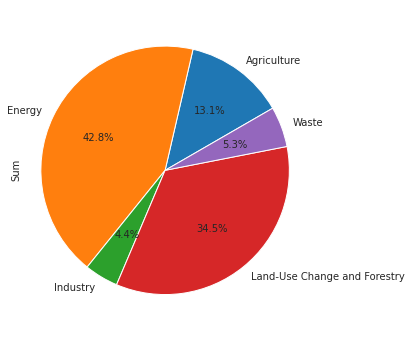

In [ ]:
ghgsector['Sum'].plot(kind='pie',figsize=(5,6),autopct='%1.1f%%',startangle=30)

plt.axis('equal')
plt.show()

## 5. Data About Fossil Fuel Consumption (Excluding Brunei, Laos, Cambodia, Myanmar)

Source:
*   https://ourworldindata.org/grapher/fossil-fuel-primary-energy
*   http://www.bp.com/statisticalreview

Keterangan:

TWh = Terrawatt Hour

1TWh = 1.000.000.000 kWh

In [ ]:
fossil = pd.read_csv('https://raw.githubusercontent.com/Jauhar-Hakim571/Tugas-Akhir-EDA/main/fossil-fuel-primary-energy.csv')
fossil.set_index(['Entity'],inplace = True)
fossil.head()

,Code,Year,Fossil Fuels (TWh)
Entity,,,
Africa,NaN,1965,658.941
Africa,NaN,1966,690.502
Africa,NaN,1967,694.671
Africa,NaN,1968,727.597
Africa,NaN,1969,737.671


In [ ]:
fossil_asean = fossil.loc[Asean2]

fossil_asean.reset_index(inplace=True)
fossil_asean.set_index(['Year'],inplace=True)
fossil_asean.drop('Code', axis=1, inplace=True)
fossil_asean.head()

,Entity,Fossil Fuels (TWh)
Year,,
1965,Indonesia,79.119
1966,Indonesia,76.879
1967,Indonesia,75.017
1968,Indonesia,78.690
1969,Indonesia,89.606


In [ ]:
fossil_asean2 = fossil.loc[Asean2].groupby(['Year','Entity']).sum()
fossil_asean2.head()

Fossil Fuels (TWh)
Year Entity                         
1965 Indonesia                79.119
     Malaysia                 27.293
     Philippines              50.202
     Singapore                47.888
     Thailand                 28.220

In [ ]:
fossil_asean3 = tabelbaru(fossil_asean2,Asean2)
fossil_asean3.head()

,Indonesia,Malaysia,Philippines,Singapore,Thailand,Vietnam
Year,,,,,,
1965,79.119,27.293,50.202,47.888,28.22,28.45
1966,76.879,31.828,54.695,54.744,33.447,50.329
1967,75.017,32.104,61.514,65.756,37.633,69.669
1968,78.69,32.544,69.989,81.735,49.317,72.147
1969,89.606,33.61,75.05,80.319,53.381,85.293


In [ ]:
fossil_asean3.dtypes

Indonesia      object
Malaysia       object
Philippines    object
Singapore      object
Thailand       object
Vietnam        object
dtype: object

In [ ]:
for i in Asean2:
    fossil_asean3[i] = pd.to_numeric(fossil_asean3[i])

fossil_asean3.dtypes

Indonesia      float64
Malaysia       float64
Philippines    float64
Singapore      float64
Thailand       float64
Vietnam        float64
dtype: object

In [ ]:
print(fossil_asean3.isnull().sum())

Indonesia      0
Malaysia       0
Philippines    0
Singapore      0
Thailand       0
Vietnam        0
dtype: int64


In [ ]:
fossil_asean3['Average']=fossil_asean3.mean(axis=1)
fossil_asean3.head()

,Indonesia,Malaysia,Philippines,Singapore,Thailand,Vietnam,Average
Year,,,,,,,
1965,79.119,27.293,50.202,47.888,28.220,28.450,43.528667
1966,76.879,31.828,54.695,54.744,33.447,50.329,50.320333
1967,75.017,32.104,61.514,65.756,37.633,69.669,56.948833
1968,78.690,32.544,69.989,81.735,49.317,72.147,64.070333
1969,89.606,33.610,75.050,80.319,53.381,85.293,69.543167


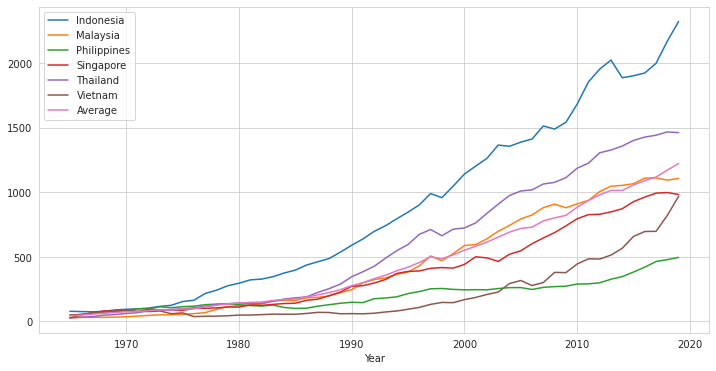

In [ ]:
fos_p = fossil_asean3.plot(subplots=False, figsize=(12,6))

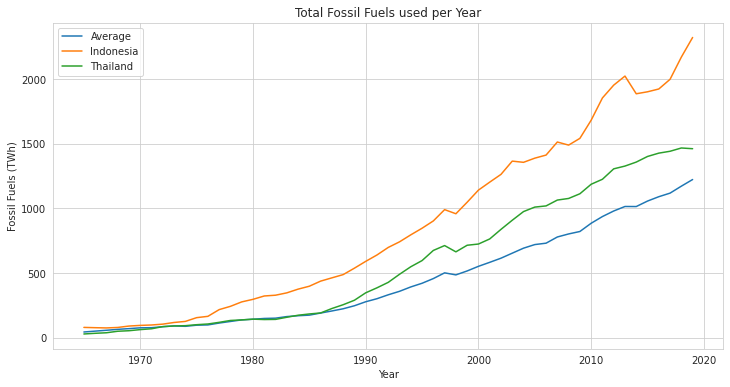

In [ ]:
plt.figure(figsize=(12,6))
fos_q=sns.lineplot(x='Year', y='Average', data=fossil_asean3,palette='Set1',label='Average')
fos_q2=sns.lineplot(x='Year', y='Indonesia', data=fossil_asean3,palette='Set1',label='Indonesia')
fos_q3=sns.lineplot(x='Year', y='Thailand', data=fossil_asean3,palette='Set1',label='Thailand')

fos_q.set(xlabel ="Year",ylabel='Fossil Fuels (TWh)',title ='Total Fossil Fuels used per Year')

plt.show()

## 6. Data About Average Temperature Anomaly

Source:
*   https://ourworldindata.org/grapher/temperature-anomaly
*   https://www.metoffice.gov.uk/hadobs/hadcrut4/index.html

Keterangan :


The Tropics average land-sea temperature anomaly relative to the 1961-1990 average temperature.

Anomali suhu rata-rata darat-laut Tropis relatif terhadap suhu rata-rata tahun 1961-1990.

In [ ]:
suhu=pd.read_csv('https://raw.githubusercontent.com/Jauhar-Hakim571/Tugas-Akhir-EDA/main/temperature-anomaly.csv')
suhu.head()

,Entity,Code,Year,Median temperature anomaly from 1961-1990 average,Upper bound (95% CI),Lower bound (95% CI)
0,Global,NaN,1850,-0.373,-0.339,-0.425
1,Global,NaN,1851,-0.218,-0.184,-0.274
2,Global,NaN,1852,-0.228,-0.196,-0.280
3,Global,NaN,1853,-0.269,-0.239,-0.321
4,Global,NaN,1854,-0.248,-0.218,-0.301


In [ ]:
suhu.drop("Code", axis=1, inplace=True)
suhu.set_index('Entity',inplace=True)
suhu=suhu.loc['Tropics']
suhu.reset_index(inplace=True)
suhu.set_index('Year',inplace=True)
suhu

,Entity,Median temperature anomaly from 1961-1990 average,Upper bound (95% CI),Lower bound (95% CI)
Year,,,,
1850,Tropics,-0.308,-0.278,-0.363
1851,Tropics,-0.229,-0.198,-0.280
1852,Tropics,-0.133,-0.104,-0.184
1853,Tropics,-0.141,-0.115,-0.195
1854,Tropics,-0.200,-0.172,-0.255
...,...,...,...,...
2015,Tropics,0.737,0.781,0.690
2016,Tropics,0.763,0.806,0.713
2017,Tropics,0.563,0.607,0.514


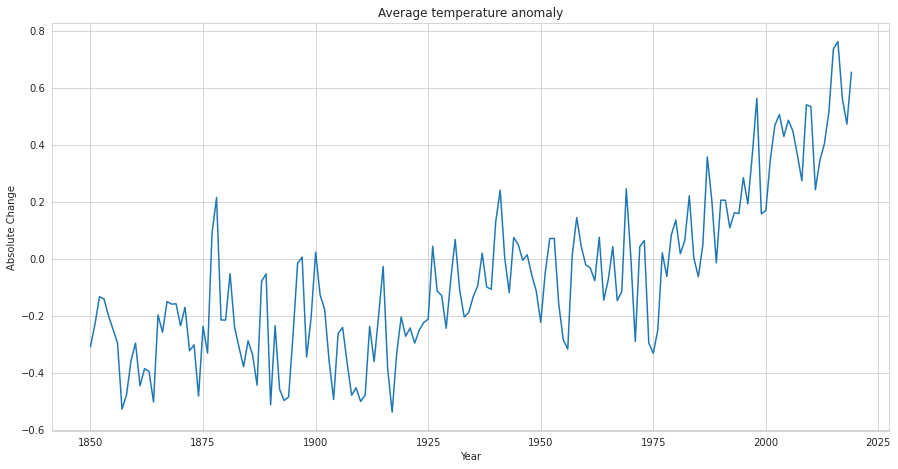

In [ ]:
plt.figure(figsize=(15,7.5))
air_q=sns.lineplot(x='Year', y='Median temperature anomaly from 1961-1990 average', data=suhu,palette='Set1')

air_q.set(xlabel ="Year",ylabel='Absolute Change',title ='Average temperature anomaly')

air_q.figure.savefig('linesuhu.png')

plt.show()

## 7. Data About Number Of Deaths From Air Pollution

Source:
*   https://ourworldindata.org/grapher/total-deaths-from-air-pollution
*   http://ghdx.healthdata.org/gbd-results-tool

Keterangan :

The sum of deaths from household, and outdoor particulate and ozone air pollution.

Jumlah kematian dari rumah tangga, dan partikulat luar ruangan dan polusi udara ozon.

In [ ]:
airpol = pd.read_csv('https://raw.githubusercontent.com/Jauhar-Hakim571/Tugas-Akhir-EDA/main/total-deaths-from-air-pollution.csv')

airpol.head()

,Entity,Code,Year,Deaths - Air pollution - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,26598.006727
1,Afghanistan,AFG,1991,26379.532218
2,Afghanistan,AFG,1992,27263.127914
3,Afghanistan,AFG,1993,30495.561499
4,Afghanistan,AFG,1994,33323.161401


In [ ]:
airpol.set_index(['Entity'],inplace = True)
airpol.head()

,Code,Year,Deaths - Air pollution - Sex: Both - Age: All Ages (Number)
Entity,,,
Afghanistan,AFG,1990,26598.006727
Afghanistan,AFG,1991,26379.532218
Afghanistan,AFG,1992,27263.127914
Afghanistan,AFG,1993,30495.561499
Afghanistan,AFG,1994,33323.161401


In [ ]:
airpol_asean = airpol.loc[Asean3]

airpol_asean.reset_index(inplace=True)
airpol_asean.set_index(['Year'],inplace=True)
airpol_asean.drop('Code', axis=1, inplace=True)
airpol_asean.head()

,Entity,Deaths - Air pollution - Sex: Both - Age: All Ages (Number)
Year,,
1990,Indonesia,114298.531998
1991,Indonesia,111828.427268
1992,Indonesia,109448.152952
1993,Indonesia,107768.850738
1994,Indonesia,105995.514561


In [ ]:
airpol_asean2 = airpol.loc[Asean3].groupby(['Year','Entity']).sum()
airpol_asean2.head()

Deaths - Air pollution - Sex: Both - Age: All Ages (Number)
Year Entity                                                                
1990 Brunei                                             43.164828          
     Cambodia                                        16717.100824          
     Indonesia                                      114298.531998          
     Laos                                             8444.930174          
     Malaysia                                         6120.773785

In [ ]:
airpol_asean3 = tabelbaru(airpol_asean2,Asean3)
airpol_asean3.tail()

,Brunei,Cambodia,Indonesia,Laos,Malaysia,Myanmar,Philippines,Singapore,Thailand,Vietnam
Year,,,,,,,,,,
2013,55.3329,10437.9,121164,5395.99,9929.33,45497,64345.1,1181.58,28454.1,49202.8
2014,50.6464,10508.7,121288,5276.12,10356.5,45250.1,64717.8,1157.32,28636.2,49458.4
2015,56.2347,10548.3,122808,5157.2,11001.3,45191.9,65695.2,1295.31,28705.4,49404.1
2016,50.6277,10599.3,123050,5066.48,10827.7,45223.2,64604.1,1250.89,29660.8,49633.6
2017,52.4396,10744.2,123753,5009.83,11352.3,45383.2,64386.2,1318.27,30625.2,50232.3


In [ ]:
airpol_asean3.dtypes

Brunei         object
Cambodia       object
Indonesia      object
Laos           object
Malaysia       object
Myanmar        object
Philippines    object
Singapore      object
Thailand       object
Vietnam        object
dtype: object

In [ ]:
for i in Asean3:
    airpol_asean3[i] =pd.to_numeric(airpol_asean3[i])

airpol_asean3.dtypes

Brunei         float64
Cambodia       float64
Indonesia      float64
Laos           float64
Malaysia       float64
Myanmar        float64
Philippines    float64
Singapore      float64
Thailand       float64
Vietnam        float64
dtype: object

In [ ]:
print(airpol_asean3.isnull().sum())
airpol_asean3.dropna(inplace=True)
print(airpol_asean3.isnull().sum())

Brunei         0
Cambodia       0
Indonesia      0
Laos           0
Malaysia       0
Myanmar        0
Philippines    0
Singapore      0
Thailand       0
Vietnam        0
dtype: int64
Brunei         0
Cambodia       0
Indonesia      0
Laos           0
Malaysia       0
Myanmar        0
Philippines    0
Singapore      0
Thailand       0
Vietnam        0
dtype: int64


In [ ]:
airpol_asean3['Rata-Rata']=airpol_asean3.mean(axis=1)
airpol_asean3.head()

,Brunei,Cambodia,Indonesia,Laos,Malaysia,Myanmar,Philippines,Singapore,Thailand,Vietnam,Rata-Rata
Year,,,,,,,,,,,
1990,43.164828,16717.100824,114298.531998,8444.930174,6120.773785,58056.449088,40716.446113,1051.633117,26741.099707,43821.837316,31601.196695
1991,43.014403,16572.403535,111828.427268,8389.426291,6277.835597,58518.514805,39550.231599,1054.737299,27224.737299,43647.862405,31310.719050
1992,42.603202,16428.090337,109448.152952,8315.756566,6412.174110,58469.847229,39727.987307,1060.526031,27626.197941,43401.728727,31093.306440
1993,41.996367,16329.437423,107768.850738,8234.186427,6474.974653,58390.290828,38311.284650,1076.932331,28197.264872,43161.457319,30798.667561
1994,41.512333,16169.170180,105995.514561,8134.094967,6574.189078,58156.787271,37674.089611,1105.235386,28398.327115,42793.982421,30504.290292


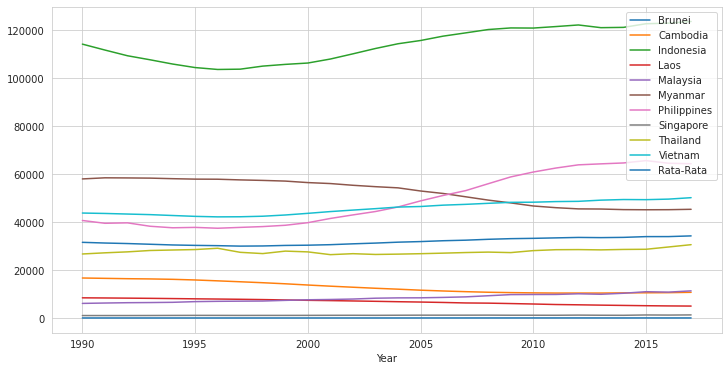

In [ ]:
air_p = airpol_asean3.plot(subplots=False, figsize=(12,6))
plt.legend(loc='upper right')

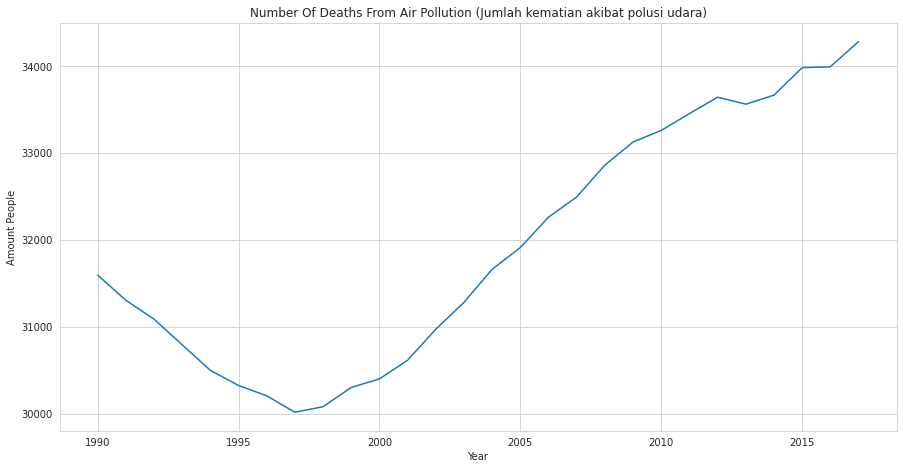

In [ ]:
plt.figure(figsize=(15,7.5))
air_q=sns.lineplot(x='Year', y='Rata-Rata', data=airpol_asean3,palette='Set1')

air_q.set(xlabel ="Year",ylabel='Amount People',title ='Number Of Deaths From Air Pollution (Jumlah kematian akibat polusi udara)')
air_q.figure.savefig('lineair.png')

plt.show()